# Subpopulation investigation

> Fill in a module description here

In [ ]:
#| default_exp core

In [ ]:
#| hide
from nbdev.showdoc import *

In [22]:
#| export
import svgutils
from svgutils.compose import *
import dabest
import matplotlib.pyplot as plt
plt.style.use('seaborn-colorblind')
import esploco.plotTools
from esploco.plotTools import setFont
setFont('Helvetica', 6)
plt.style.use('seaborn-colorblind')
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['svg.fonttype'] = 'none'
import pickle
import pandas as pd
import scipy
import numpy as np
import dabest
paperpath = '/Users/sangyuxu/Library/Mobile Documents/com~apple~CloudDocs/EspressoManu/'
picklepath = paperpath + 'DataforFigures/Behavior/Data/pickles/'
imagepath = paperpath + 'Figures20240202/'
figurepath = imagepath + '/Figure5/'
panelpath = imagepath + '/Figure5/panels/'

/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_40717/3999925552.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')
/var/folders/jq/z93pq6zd39s_vky_yyjtcxp00000gn/T/ipykernel_40717/3999925552.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-colorblind')


In [34]:
def plotcontrast(data, metric, subdatafilename, palette, title, swarm_label ='Total Volume (nL)', swarm_ylim = [-10, 900],order = [0,1,2]):
    subdata = data[['GenoReduced', 'Status','Light', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
    c = dabest.load(subdata, x = ['Status', 'Genotype'], y =  metric, delta2 = True, experiment = 'Light', x1_level=['Ctrl', 'Test'])
    f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.15},  swarm_bars_kwargs={'alpha':.15},
                         raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='Genotype', 
                         custom_palette= palette, fig_size=(2, 4), swarm_ylim= swarm_ylim, swarm_label=swarm_label, delta_text = False)
    f.axes[0].set_xticklabels(['C', 'T', 'C', 'T'])
    
    f.axes[0].legend(frameon=False,loc='upper left',bbox_to_anchor=[0.5, 1.05], fontsize= 9, markerscale =.5, )
    # leg = f.axes[0].get_legend()
    # hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    # hl_dict['_child0'].set_color(palette[subdata['Genotype'].unique()[order[0]]])
    # hl_dict['_child1'].set_color(palette[subdata['Genotype'].unique()[order[1]]])
    # hl_dict['_child2'].set_color(palette[subdata['Genotype'].unique()[order[2]]])
    
    if 'Starved' in title:
        bgc = 'steelblue'
    else:
        bgc = 'orange'
    f.suptitle(title, weight = 'medium', fontsize = 12,color= bgc, y=.97)

    f.axes[1].set_xticklabels(['', 'Off', '', 'On','', r'$\Delta\Delta$'])
    f.axes[2].set_ylabel(r'$\Delta\Delta$')

    f.axes[1].set_ylabel(r'$\Delta$ ' + swarm_label)
    f.axes[1].set_ylabel(r'$\Delta$ ' + swarm_label)
    f.savefig(panelpath+  subdatafilename + '.svg')
    f.savefig(panelpath+  subdatafilename + '.png', dpi = 300)
    subdata.to_csv(panelpath+  subdatafilename + '.csv')
    return f, c



def plot2contrast(data, metric, subdatafilename, palette, title, swarm_label ='Total Volume (nL)', swarm_ylim = [-10, 1200],order = [0,1,2]):
    subdata = data[['GenoReduced', 'Status','Light', metric]].rename(columns = {'GenoReduced':'Genotype'}).reset_index()
    c = dabest.load(subdata, x = 'Status', y =  metric, delta2 = False, idx=['Ctrl', 'Test'])
    f = c.mean_diff.plot(contrast_bars_kwargs= {'alpha':.15},  swarm_bars_kwargs={'alpha':.15},
                         raw_marker_size=.4, es_marker_size= 5, swarm_desat = 1,color_col='Genotype', 
                         custom_palette= palette, fig_size=(1.5, 4), swarm_ylim= swarm_ylim, swarm_label=swarm_label,
                        float_contrast=False, delta_text = False)
    f.axes[0].set_xticklabels(['C', 'T'])
    
    # f.axes[0].legend(frameon=False,bbox_to_anchor=[0.1, 1.10], loc='upper left', fontsize= 9, markerscale =.5, )
    f.axes[0].legend(frameon=False,)
    # leg = f.axes[0].get_legend()
    # hl_dict = {handle.get_label(): handle for handle in leg.legendHandles}
    # hl_dict['_child0'].set_color(palette[subdata['Genotype'].unique()[order[0]]])
    # hl_dict['_child1'].set_color(palette[subdata['Genotype'].unique()[order[1]]])
    # hl_dict['_child2'].set_color(palette[subdata['Genotype'].unique()[order[2]]])
    
    if 'Starved' in title:
        bgc = 'steelblue'
    else:
        bgc = 'orange'
    f.suptitle(title, weight = 'medium', fontsize = 12,color= bgc, y=.97)
    f.axes[1].set_xticklabels(['', 'T - C'])
    f.axes[1].set_ylabel(r'$\Delta$ ' + swarm_label)
    f.savefig(panelpath+  subdatafilename + '.svg')
    f.savefig(panelpath+  subdatafilename + '.png', dpi = 300)
    subdata.to_csv(panelpath+  subdatafilename + '.csv')
    return f, c


In [35]:
TrhCsCh = pd.read_csv(picklepath + 'TrhCsCh_ele.csv').sort_values(by = ['Light', 'Status'])
R50CsCh = pd.read_csv(picklepath + 'R50CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
TrhACR = pd.read_csv(picklepath + 'TrhACRRound2_ele.csv').sort_values(by = ['Light', 'Status'])
R50ACR = pd.read_csv(picklepath + 'R50ACRRound2_ele.csv').sort_values(by = ['Light', 'Status'])




TrhVNCCsCh = pd.read_csv(picklepath + 'TrhVNCCsCh_ele.csv').sort_values(by = ['Light', 'Status'])
TrhVNCACR1 = pd.read_csv(picklepath + 'TrhVNCACR1_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC1CsCh = pd.read_csv(picklepath + 'SXVNC1CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC1ACR1 = pd.read_csv(picklepath + 'SXVNC1ACR1_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC2CsCh = pd.read_csv(picklepath + 'SXVNC2CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC2ACR1 = pd.read_csv(picklepath + 'SXVNC2ACR1_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC3CsCh = pd.read_csv(picklepath + 'SXVNC3CsCh_ele.csv').sort_values(by = ['Light', 'Status'])
SXVNC3ACR1 = pd.read_csv(picklepath + 'SXVNC3ACR1_ele.csv').sort_values(by = ['Light', 'Status'])
RLTG = pd.read_csv(picklepath + 'RLTG_ele.csv').sort_values(by = ['Light', 'Status'])
TLRG = pd.read_csv(picklepath + 'TLRG_ele.csv').sort_values(by = ['Light', 'Status'])
TrhBrainCsCh = pd.read_csv(picklepath + 'TrhBrainCsCh_ele.csv').sort_values(by = ['Light', 'Status'])


for df in [TrhCsCh, TrhACR, RLTG,TLRG, TrhBrainCsCh, TrhVNCCsCh, TrhVNCACR1, SXVNC1CsCh, SXVNC2CsCh, SXVNC1ACR1, SXVNC2ACR1, SXVNC3ACR1, SXVNC3CsCh]:
    df['Volume'] = df['Volume']*1000
    df['Meal Size'] = df['Meal Size']*1000
    df['Feed Speed'] = df['Feed Speed']*1000


In [36]:
RLTG['GenoReduced'] = RLTG.Genotype.replace({'r50h05-lexa; trh-gal4>lexaop-gal80; uas-chrimson':'Trhn-G>Chr/R50H050-L>G80', 'w1118; lexaop-gal80; uas-chrimson':'LexAOp-Gal80; UAS-Chr/w', 'w1118; r50h05-lexa; trh-gal4':'Trhn-G; R50H05-L/w'}).astype('category').cat.set_categories(['Trhn-G>Chr/R50H050-L>G80', 'Trhn-G; R50H05-L/w', 'LexAOp-Gal80; UAS-Chr/w'], ordered=True)
TLRG['GenoReduced'] = TLRG.Genotype.replace({'trh-lexa; r50h05-gal4>lexaop-gal80; uas-chrimson':'Trhn-L>G80/R50H050-G>Chr', 'w1118; uas-chrimson; lexaop-gal80':'LexAOp-Gal80; UAS-Chr/w', 'w1118; trh-lexa; r50h05-gal4':'Trhn-L; R50H05-G/w'}).astype('category').cat.set_categories(['Trhn-L>G80/R50H050-G>Chr', 'Trhn-L; R50H05-G/w', 'LexAOp-Gal80; UAS-Chr/w'], ordered=True)
TrhBrainCsCh['GenoReduced'] = TrhBrainCsCh.Genotype.replace({'trh-gal4>tsh-gal80; uas-cschrimson':'Trhn>Brain-Chr', 'w1118; tsh-gal80; uas-cschrimson':'Brain-Chr/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['Brain-Chr/w', 'Trhn/w', 'Trhn>Brain-Chr'], ordered=True)
TrhVNCCsCh['GenoReduced'] = TrhVNCCsCh.Genotype.replace({'trh-gal4>uas-vnc-cschrimson':'Trhn>VNC-Chr', 'w1118; uas-vnc-cschrimson':'VNC-Chr/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['VNC-Chr/w', 'Trhn/w', 'Trhn>VNC-Chr'], ordered=True)
TrhVNCACR1['GenoReduced'] = TrhVNCACR1.Genotype.replace({'trh-gal4>uas-vnc-acr1':'Trhn>VNC-ACR1', 'w1118; uas-vnc-acr1':'VNC-ACR1/w', 'w1118; trh-gal4':'Trhn/w'}).astype('category').cat.set_categories(['VNC-ACR1/w', 'Trhn/w', 'Trhn>VNC-ACR1'], ordered=True)
SXVNC1CsCh['GenoReduced'] = SXVNC1CsCh.Genotype.replace({'trh-ad; vt-gal4.dbd>uas-csch':'SXVNC1>Chr', 'w1118; trh-ad; uas-csch':'Trhn-AD; Chr/w', 'w1118; vt-gal4dbd':'VT042751-DBD/w'}).astype('category').cat.set_categories(['Trhn-AD; Chr/w', 'VT042751-DBD/w', 'SXVNC1>Chr'], ordered=True)
SXVNC1ACR1['GenoReduced'] = SXVNC1ACR1.Genotype.replace({'sxvnc1-gal4>uas-acr1':'SXVNC1>ACR1', 'w1118; uas-acr1':'ACR1/w',  'w1118; sxvnc1-gal4':'SXVNC1/w', 'w1118; sxvnc2-gal4':'SXVNC1/w'}).astype('category').cat.set_categories(['ACR1/w', 'SXVNC1/w', 'SXVNC1>ACR1'], ordered=True)
SXVNC2CsCh['GenoReduced'] = SXVNC2CsCh.Genotype.replace({'sxvnc2-gal4>uas-csch':'SXVNC2>Chr', 'w1118; uas-cschrimson':'Chr/w', 'w1118; sxvnc2-gal4':'SXVNC2/w'}).astype('category').cat.set_categories(['Chr/w', 'SXVNC2/w', 'SXVNC2>Chr'], ordered=True)
SXVNC2ACR1['GenoReduced'] = SXVNC2ACR1.Genotype.replace({'sxvnc2-gal4>uas-acr1':'SXVNC2>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; sxvnc2-gal4':'SXVNC2/w'}).astype('category').cat.set_categories(['ACR1/w', 'SXVNC2/w', 'SXVNC2>ACR1'], ordered=True)
SXVNC3CsCh['GenoReduced'] = SXVNC3CsCh.Genotype.replace({'sxvnc3-gal4>uas-csch':'SXVNC3>Chr', 'w1118; uas-cschrimson':'Chr/w','w1118;uas-cschrimson':'Chr/w', 'trh-gal4; w1118': 'SXVNC3/w', 'w1118; sxvnc3-gal4':'SXVNC3/w'}).astype('category').cat.set_categories(['Chr/w', 'SXVNC3/w', 'SXVNC3>Chr'], ordered=True)
SXVNC3ACR1['GenoReduced'] = SXVNC3ACR1.Genotype.replace({'sxvnc3-gal4>uas-acr1':'SXVNC3>ACR1', 'w1118; uas-acr1':'ACR1/w', 'w1118; sxvnc3-gal4':'SXVNC3/w'}).astype('category').cat.set_categories(['ACR1/w', 'SXVNC3/w', 'SXVNC3>ACR1'], ordered=True)

RLTGpalette = {'Trhn-G>Chr/R50H050-L>G80':'orangered', 'LexAOp-Gal80; UAS-Chr/w':'gray', 'Trhn-G; R50H05-L/w':'k'}
TLRGpalette = {'Trhn-L>G80/R50H050-G>Chr':'orangered', 'LexAOp-Gal80; UAS-Chr/w':'gray', 'Trhn-L; R50H05-G/w':'k'}
TrhBrainCsChpalette = {'Trhn>Brain-Chr':'orangered', 'Brain-Chr/w':'gray', 'Trhn/w':'k'}
TrhVNCCsChpalette = {'Trhn>VNC-Chr':'orangered', 'VNC-Chr/w':'gray', 'Trhn/w':'k'}
TrhVNCACRpalette = {'Trhn>VNC-ACR1':'seagreen', 'VNC-ACR1/w':'gray', 'Trhn/w':'k'}
SXVNC1CsChpalette = {'SXVNC1>Chr':'orangered', 'Trhn-AD; Chr/w':'gray', 'VT042751-DBD/w':'k'}
SXVNC1ACR1palette = {'SXVNC1>ACR1':'seagreen', 'ACR1/w':'gray', 'SXVNC1/w':'k'}
SXVNC2CsChpalette = {'SXVNC2>Chr':'orangered', 'Chr/w':'gray', 'SXVNC2/w':'k'}
SXVNC2ACR1palette = {'SXVNC2>ACR1':'seagreen', 'ACR1/w':'gray', 'SXVNC2/w':'k'}
SXVNC3CsChpalette = {'SXVNC3>Chr':'orangered', 'Chr/w':'gray', 'SXVNC3/w':'k'}
SXVNC3ACR1palette = {'SXVNC3>ACR1':'seagreen', 'ACR1/w':'gray', 'SXVNC3/w':'k'}


trhacrpalette = {'Trhn>ACR1':'seagreen', 'ACR1/w':'gray', 'Trhn/w':'k'}
r50acrpalette = {'R50H05>ACR1':'seagreen', 'ACR1/w':'gray', 'R50H05/w':'k'}

In [37]:
TLRG['GenoReduced'].unique()

['LexAOp-Gal80; UAS-Chr/w', 'Trhn-L; R50H05-G/w', 'Trhn-L>G80/R50H050-G>Chr']
Categories (3, object): ['Trhn-L>G80/R50H050-G>Chr' < 'Trhn-L; R50H05-G/w' < 'LexAOp-Gal80; UAS-Chr/w']

/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 25.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 47.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


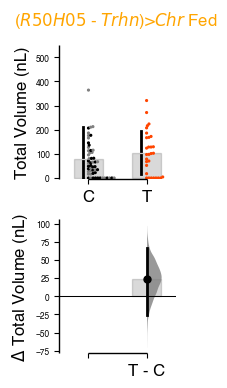

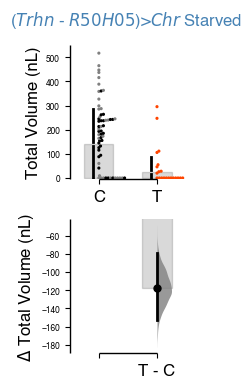

In [38]:
RLTGTLRGpalette = {'Trhn>Chr/R50H050>G80':'orangered', 'LexAOp-Gal80; UAS-Chr/w':'gray', 'Trhn-G; R50H05-L/w':'k', 'Trhn>G80/R50H050>Chr':'orangered', 'Trhn-L; R50H05-G/w':'k' }

RLTG['Light'] = 'RLTG'
TLRG['Light'] = 'TLRG'
RLTGTLRG = pd.concat([RLTG, TLRG], axis = 0)
# fTLRGRLTg_Vcontrast, TLRGRLTg_Vcontrast = plotcontrast(RLTGTLRG, 'Volume', 'TLRGRLTG_Vcontrast', palette = RLTGTLRGpalette, swarm_ylim = [-5, 200],  title= 'Trh and R50H05 Intersection Starved')
fTLRG_Vcontrast, TLRG_Vcontrast = plot2contrast(TLRG, 'Volume', 'TLRG_Vcontrast', swarm_ylim = [-5, 550], palette = TLRGpalette, title= '($R50H05$ - $Trhn$)>$Chr$ Fed')
fRLTG_Vcontrast, RLTG_Vcontrast = plot2contrast(RLTG, 'Volume', 'RLTG_Vcontrast', swarm_ylim = [-5, 550], palette = RLTGpalette, title= '($Trhn$ - $R50H05$)>$Chr$ Starved')
# fTLRG_Vcontrast.axes[0].legend()


/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 19.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 4.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:294: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 34.3% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dab

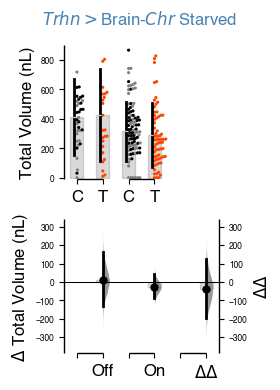

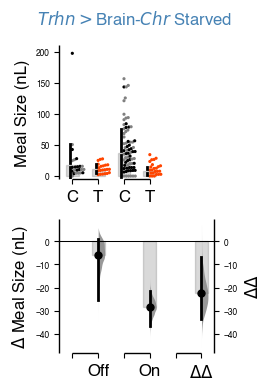

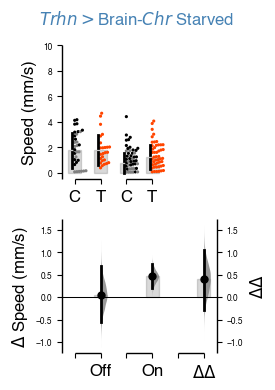

In [39]:
fTrhBrain_Vcontrast, TrhBrain_Vcontrast = plotcontrast(TrhBrainCsCh, 'Volume', 'TrhBrainCsCh_Vcontrast', palette = TrhBrainCsChpalette, title= '$Trhn>$Brain-$Chr$ Starved')

fTrhBrain_MSVcontrast, TrhBrain_MScontrast = plotcontrast(TrhBrainCsCh, 'Meal Size', 'TrhBrainCsCh_MScontrast', palette = TrhBrainCsChpalette, swarm_ylim = [-5, 210], swarm_label = 'Meal Size (nL)', title= '$Trhn>$Brain-$Chr$ Starved')
fTrhBrain_Spcontrast, TrhBrain_Spcontrast = plotcontrast(TrhBrainCsCh, 'Speed', 'TrhBrainCsCh_SPcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-.5, 10], palette = TrhBrainCsChpalette, title= '$Trhn>$Brain-$Chr$ Starved')



/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 3.1% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 32.4% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 43.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/_effsize_objects.py:299: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest

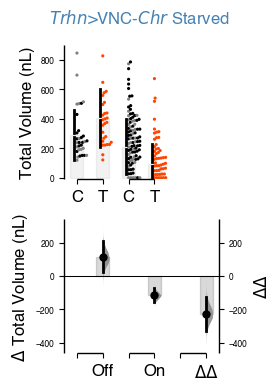

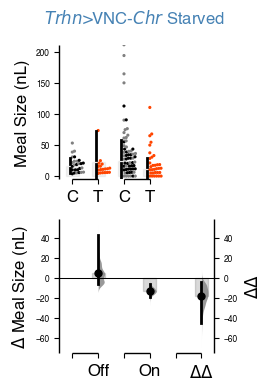

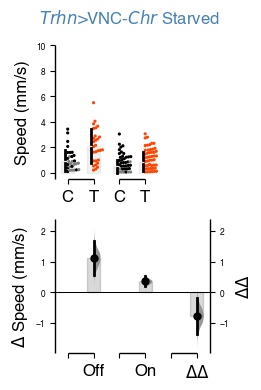

In [9]:
fTrhVNCCsCh_Vcontrast, TrhVNCCsCh_Vcontrast = plotcontrast(TrhVNCCsCh,'Volume', 'TrhVNCCsCh_Vcontrast', palette = TrhVNCCsChpalette, title= '$Trhn$>VNC-$Chr$ Starved')
fTrhVNCCsCh_MScontrast, TrhVNCCsCh_MScontrast = plotcontrast(TrhVNCCsCh, 'Meal Size', 'TrhVNCCsCh_MScontrast', palette = TrhVNCCsChpalette, swarm_label = 'Meal Size (nL)',swarm_ylim = [-5, 210], title= '$Trhn$>VNC-$Chr$ Starved')
fTrhVNCCsCh_Spcontrast, TrhVNCCsCh_Spcontrast = plotcontrast(TrhVNCCsCh, 'Speed', 'TrhVNCCsCh_SPcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-.5, 10], palette = TrhVNCCsChpalette, title= '$Trhn$>VNC-$Chr$ Starved')

/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 32.7% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 7.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 38.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 46.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

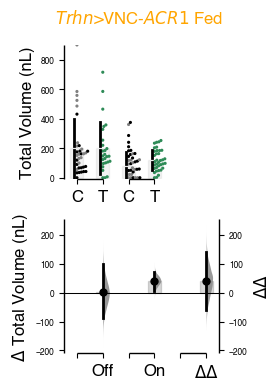

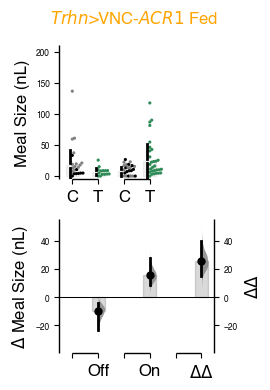

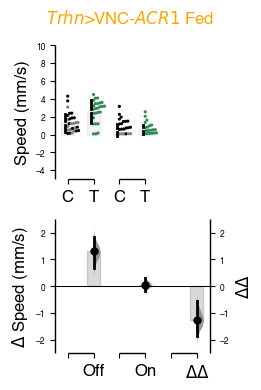

In [10]:
fTrhVNCACR_Vcontrast, TrhVNCACR_Vcontrast = plotcontrast(TrhVNCACR1, 'Volume', 'TrhVNCACR1_Vcontrast', palette = TrhVNCACRpalette, title= '$Trhn$>VNC-$ACR1$ Fed')
fTrhMSNCACR_MScontrast, TrhVNCACR_MScontrast = plotcontrast(TrhVNCACR1, 'Meal Size', 'TrhVNCACR1_MScontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = TrhVNCACRpalette, title= '$Trhn$>VNC-$ACR1$ Fed')
fTrhMSNCACR_Spcontrast, TrhVNCACR_Spcontrast = plotcontrast(TrhVNCACR1, 'Speed', 'TrhVNCACR1_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = TrhVNCACRpalette, title= '$Trhn$>VNC-$ACR1$ Fed')

/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 5.9% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 34.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 20.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 36.5% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

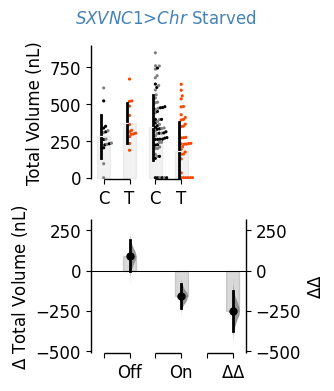

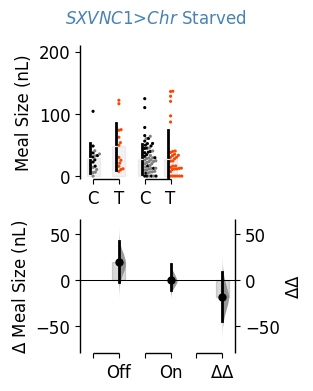

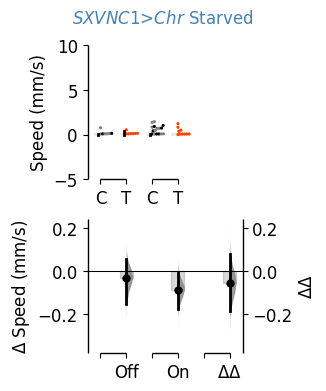

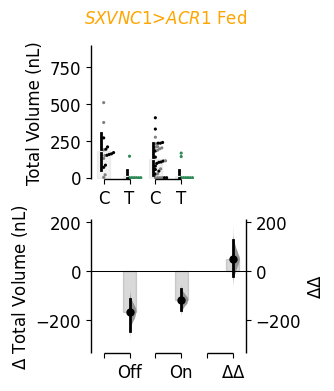

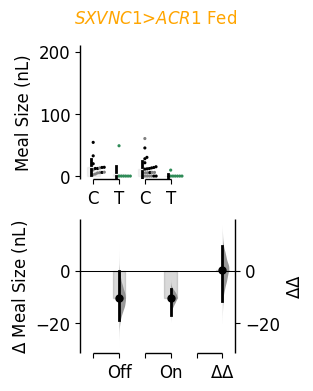

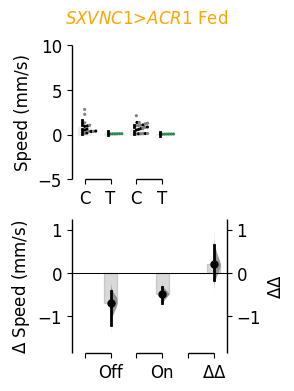

In [13]:
fSXVNC1CsCh_Vcontrast, SXVNC1CsCh_Vcontrast = plotcontrast(SXVNC1CsCh, 'Volume', 'SXVNC1CsCh_Vcontrast', palette = SXVNC1CsChpalette, title= '$SXVNC1$>$Chr$ Starved')
fSXVNC1CsCh_MScontrast, SXVNC1CsCh_MScontrast = plotcontrast(SXVNC1CsCh, 'Meal Size', 'SXVNC1CsCh_MScontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC1CsChpalette, title= '$SXVNC1$>$Chr$ Starved')
fSXVNC1CsCh_Spcontrast, SXVNC1CsCh_Spcontrast = plotcontrast(SXVNC1CsCh, 'Speed', 'SXVNC1CsCh_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC1CsChpalette, title= '$SXVNC1$>$Chr$ Starved')

fSXVNC1ACR1_Vcontrast, SXVNC1ACR1_Vcontrast = plotcontrast(SXVNC1ACR1, 'Volume', 'SXVNC1ACR1_Vcontrast', palette = SXVNC1ACR1palette, title= '$SXVNC1$>$ACR1$ Fed')
fSXVNC1ACR1_MScontrast, SXVNC1ACR1_MScontrast = plotcontrast(SXVNC1ACR1, 'Meal Size', 'SXVNC1ACR1_Vcontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC1ACR1palette, title= '$SXVNC1$>$ACR1$ Fed')
fSXVNC1ACR1_Spcontrast, SXVNC1ACR1_Spcontrast = plotcontrast(SXVNC1ACR1, 'Speed', 'SXVNC1ACR1_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC1ACR1palette, title= '$SXVNC1$>$ACR1$ Fed')




/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 6.2% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 24.4% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 45.6% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 10.4% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)
/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools

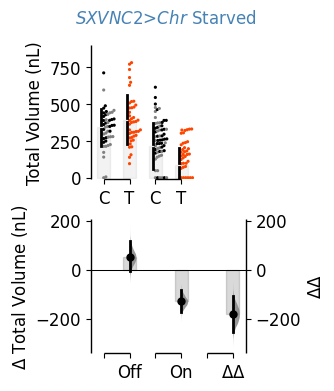

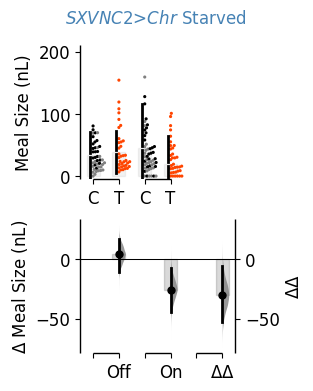

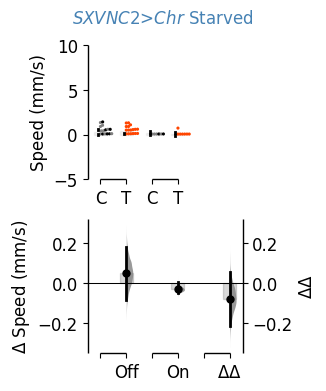

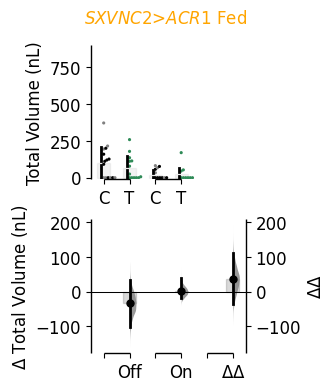

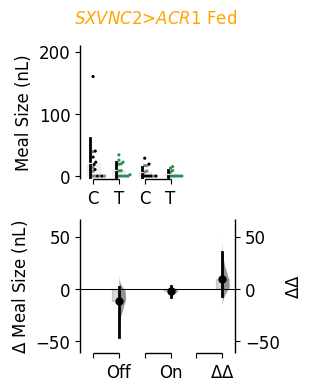

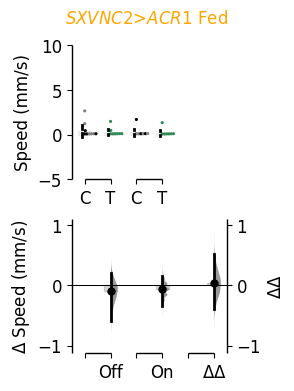

In [14]:
fSXVNC2CsCh_Vcontrast, SXVNC2CsCh_Vcontrast = plotcontrast(SXVNC2CsCh, 'Volume', 'SXVNC2CsCh_Vcontrast', palette = SXVNC2CsChpalette, title= '$SXVNC2$>$Chr$ Starved')
fSXVNC2CsCh_MScontrast, SXVNC2CsCh_MScontrast = plotcontrast(SXVNC2CsCh, 'Meal Size', 'SXVNC2CsCh_MScontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC2CsChpalette, title= '$SXVNC2$>$Chr$ Starved')
fSXVNC2CsCh_Spcontrast, SXVNC2CsCh_Spcontrast = plotcontrast(SXVNC2CsCh, 'Speed', 'SXVNC2CsCh_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC2CsChpalette, title= '$SXVNC2$>$Chr$ Starved')

fSXVNC2ACR1_Vcontrast, SXVNC2ACR1_Vcontrast = plotcontrast(SXVNC2ACR1, 'Volume', 'SXVNC2ACR1_Vcontrast', palette = SXVNC2ACR1palette, title='$SXVNC2$>$ACR1$ Fed')
fSXVNC2ACR1_MScontrast, SXVNC2ACR1_MScontrast = plotcontrast(SXVNC2ACR1, 'Meal Size', 'SXVNC2ACR1_Vcontrast', swarm_label = 'Meal Size (nL)',  swarm_ylim = [-5, 210], palette = SXVNC2ACR1palette, title= '$SXVNC2$>$ACR1$ Fed')
fSXVNC2ACR1_Spcontrast, SXVNC2ACR1_Spcontrast = plotcontrast(SXVNC2ACR1, 'Speed', 'SXVNC2ACR2_Spcontrast', swarm_label = 'Speed (mm/s)',swarm_ylim = [-5, 10], palette = SXVNC2ACR1palette, title= '$SXVNC2$>$ACR1$ Fed')




/Applications/anaconda3/envs/SerotoninEthomics/lib/python3.10/site-packages/dabest/plot_tools.py:1914: UserWarning: 8.0% of the points cannot be placed. You might want to decrease the size of the markers.
  warnings.warn(err)


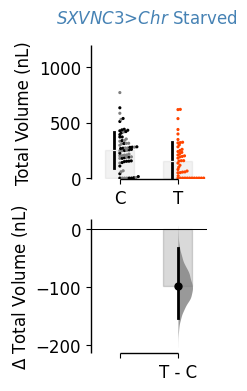

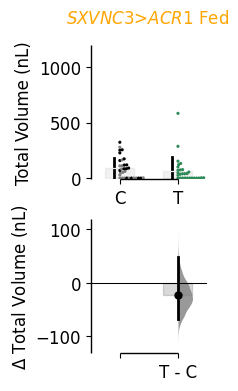

In [15]:
SXVNC3palette = {'SXVNC3>Chr': 'orangered', 'CsCh/w': 'gray', 'SXVNC3/w': 'k', 'SXVNC3>ACR1': 'seagreen', 'ACR1/w': 'gray', 'SXVNC3/w': 'k'}

# SXVNC3ACR11 = SXVNC3ACR1.loc[SXVNC3ACR1['date'] == '2024-04-19_14-18-52']
# SXVNC3 = pd.concat([SXVNC3CsCh, SXVNC3ACR1], axis = 0)
fSXVNC3CsCh_Vcontrast, SXVNC3CsCh_Vcontrast = plot2contrast(SXVNC3CsCh, 'Volume', 'SXVNC3CsCh_Vcontrast', palette = SXVNC3CsChpalette, title= '$SXVNC3$>$Chr$ Starved')
fSXVNC3ACR1_Vcontrast, SXVNC3ACR1_Vcontrast = plot2contrast(SXVNC3ACR1, 'Volume', 'SXVNC3ACR1_Vcontrast', palette = SXVNC3ACR1palette, title= '$SXVNC3$>$ACR1$ Fed')
# print(SXVNC3palette)
# print(SXVNC3.GenoReduced.unique())

In [16]:
cschV = [TrhBrain_Vcontrast, TrhVNCCsCh_Vcontrast, SXVNC1CsCh_Vcontrast,SXVNC2CsCh_Vcontrast]
acrV = [TrhVNCACR_Vcontrast, SXVNC1ACR1_Vcontrast,SXVNC2ACR1_Vcontrast]
cschMS = [TrhBrain_MScontrast, TrhVNCCsCh_MScontrast, SXVNC1CsCh_MScontrast,SXVNC2CsCh_MScontrast]
acrMS = [TrhVNCACR_MScontrast, SXVNC1ACR1_MScontrast,SXVNC2ACR1_MScontrast]
cschSp = [TrhBrain_Spcontrast, TrhVNCCsCh_Spcontrast, SXVNC1CsCh_Spcontrast,SXVNC2CsCh_Spcontrast]
acrSp = [TrhVNCACR_Spcontrast, SXVNC1ACR1_Spcontrast,SXVNC2ACR1_Spcontrast]
sx3cschV = SXVNC3CsCh_Vcontrast
sv3acrV= SXVNC3ACR1_Vcontrast

# sx3cschV = SXVNC3CsCh_MScontrast
# sv3acrV= SXVNC3ACR1_MScontrast


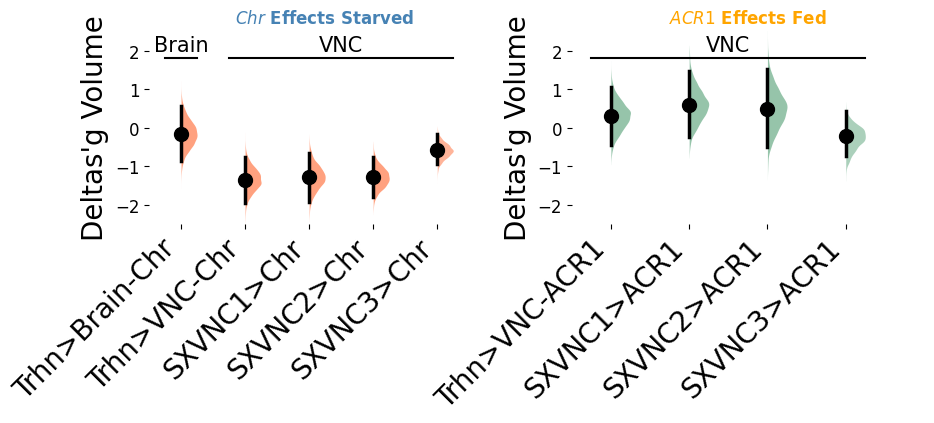

In [17]:
setFont('inter', 12) 
f, axes = plt.subplots(1, 2, figsize = (10, 2.5))
from dabest.forest_plot import forest_plot
forest_plot(cschV, contrast_labels =['Trhn>Brain-Chr', 'Trhn>VNC-Chr', 'SXVNC1>Chr', 'SXVNC2>Chr'], custom_palette = ['orangered', 'orangered', 'orangered', 'orangered'], effect_size='delta_g', ax = axes [0],alpha_violin_plot=.5)
forest_plot(acrV, contrast_labels =['Trhn>VNC-ACR1', 'SXVNC1>ACR1', 'SXVNC2>ACR1'], effect_size='delta_g', custom_palette = ['seagreen', 'seagreen', 'seagreen'], ax = axes [1],alpha_violin_plot=.5)
c = sx3cschV
default_violinplot_kwargs = {'widths':0.5, 'vert':True,'showextrema':False, 'showmedians':False}
v = axes[0].violinplot( c.hedges_g.results.bootstraps[0], positions=[5], **default_violinplot_kwargs)
dabest.plot_tools.halfviolin(v, alpha = 0.4)
axes[0].collections[4].set_fc('orangered')
axes[0].plot(5, c.hedges_g.results.difference[0], 'k.', markersize = 20)
axes[0].plot([5, 5], [c.hedges_g.results.bca_low[0], c.hedges_g.results.bca_high[0]], 'k', linewidth = 2.5)
axes[0].set_xticks(range(1, 6),['Trhn>Brain-Chr', 'Trhn>VNC-Chr', 'SXVNC1>Chr', 'SXVNC2>Chr', 'SXVNC3>Chr'], ha = 'right')
c = sv3acrV
default_violinplot_kwargs = {'widths':0.5, 'vert':True, 'showextrema':False, 'showmedians':False}
v = axes[1].violinplot( c.hedges_g.results.bootstraps[0], positions=[4], **default_violinplot_kwargs)
dabest.plot_tools.halfviolin(v, alpha = 0.4)
axes[1].collections[3].set_fc('seagreen')
axes[1].plot(4, c.hedges_g.results.difference[0], 'k.', markersize = 20)
axes[1].plot([4, 4], [c.hedges_g.results.bca_low[0], c.hedges_g.results.bca_high[0]], 'k', linewidth = 2.5)
axes[1].set_xticks(range(1, 5), ['Trhn>VNC-ACR1', 'SXVNC1>ACR1', 'SXVNC2>ACR1', 'SXVNC3>ACR1'], ha = 'right')
axes[0].set_ylabel('Deltas\'g Volume')
axes[1].set_ylabel('Deltas\'g Volume')
axes[0].set_title('$Chr$ Effects Starved', fontname = 'inter',fontsize = 12, weight = 'semibold', color= 'steelblue')
axes[1].set_title('$ACR1$ Effects Fed', fontname = 'inter',fontsize = 12, weight = 'semibold', color= 'orange')
axes[0].set_ylim(-2.5, 2.5)
axes[1].set_ylim(-2.5, 2.5)
axes[0].set_xlim(0.5, 6)
axes[1].set_xlim(0.5, 5)
axes[0].plot([1.75, 5.25], [1.8, 1.8], color = 'k')
axes[0].plot([0.75, 1.25], [1.8, 1.8], color = 'k')
axes[0].text(1, 2,'Brain', color = 'k', ha = 'center', fontsize= 15)
axes[0].text(3.5, 2,'VNC', color = 'k', ha = 'center', fontsize= 15)
axes[1].plot([.75, 4.25], [1.8, 1.8], color = 'k')
axes[1].text(2.5, 2,'VNC', color = 'k', ha = 'center', fontsize= 15)
f.savefig(panelpath + 'VNCVforestplot.svg', bbox_inches='tight')
f.savefig(panelpath + 'VNCVforestplot.png',bbox_inches='tight', dpi = 300)


In [ ]:
TrhVNCCsCh_Vcontrast.mean_diff.delta_delta.bootstraps

array([array([119.51488839, 158.84478571,  86.90135268, ...,  76.19858036,
               49.17191964,  96.66176786])                                ,
       array([-118.58223839,  -75.99719612, -158.61472024, ..., -141.9276344 ,
              -109.01557709, -145.85769408])                                  ],
      dtype=object)

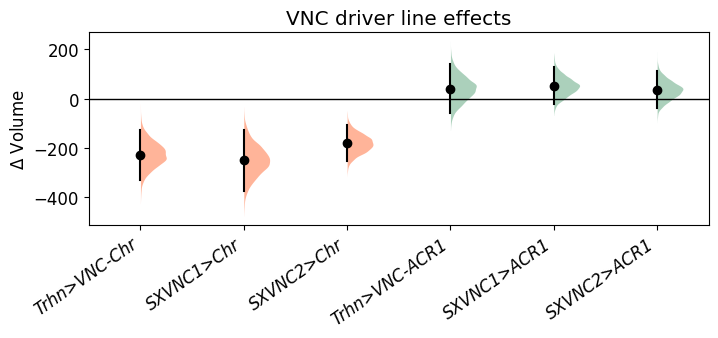

In [18]:
ticks = [0, 1, 2, 3, 4, 5]
effects = ['dd', 'dd', 'dd',  'dd', 'dd', 'dd']
colors = ['orangered', 'orangered', 'orangered',  'seagreen', 'seagreen', 'seagreen']
newcontrasts = [TrhVNCCsCh_Vcontrast, SXVNC1CsCh_Vcontrast,SXVNC2CsCh_Vcontrast, TrhVNCACR_Vcontrast, SXVNC1ACR1_Vcontrast,SXVNC2ACR1_Vcontrast]

setFont('inter', 12) 
f, axes = plt.subplots(1, 1, figsize = (8, 2.5))
axes.plot([-.5, 7.5], [0, 0], 'k', linewidth = 1)
for i in ticks:
    c = newcontrasts[i]
    default_violinplot_kwargs = {'widths':0.5, 'vert':True,'showextrema':False, 'showmedians':False}
    if effects[i] == 'dd':
        v = axes.violinplot(c.mean_diff.delta_delta.bootstraps_delta_delta, positions=[i], **default_violinplot_kwargs)
        axes.plot(i, c.mean_diff.delta_delta.difference, 'k.', markersize = 12)
        axes.plot([i, i], [c.mean_diff.delta_delta.bca_low, c.mean_diff.delta_delta.bca_high], 'k', linewidth = 1.5)
    else:
        v = axes.violinplot(c.mean_diff.results.bootstraps[0], positions=[i], **default_violinplot_kwargs)
        axes.plot(i, c.mean_diff.results.difference[0], 'k.', markersize = 12)
        axes.plot([i, i], [c.mean_diff.results.bca_low[0], c.mean_diff.results.bca_high[0]], 'k', linewidth = 1.5)
    dabest.plot_tools.halfviolin(v, alpha = 0.4)
    axes.collections[i].set_fc(colors[i])
    axes.set_xticks(range(0, 6),[ 'Trhn>VNC-Chr', 'SXVNC1>Chr', 'SXVNC2>Chr',  'Trhn>VNC-ACR1', 'SXVNC1>ACR1', 'SXVNC2>ACR1'], ha = 'right', rotation = 35)    
axes.set_ylabel('$\Delta$ Volume')
axes.set_xlim(-.5, 5.5)
axes.set_title('VNC driver line effects')
xtl = axes.get_xticklabels()    
for x in xtl:
    x.set_style('italic')   
f.savefig(panelpath + 'VNCVforestplot.svg', bbox_inches='tight')
f.savefig(panelpath + 'VNCVforestplot.png',bbox_inches='tight', dpi = 300)



# c = sv3acrV
# default_violinplot_kwargs = {'widths':0.5, 'vert':True, 'showextrema':False, 'showmedians':False}
# v = axes[1].violinplot( c.hedges_g.results.bootstraps[0], positions=[4], **default_violinplot_kwargs)
# dabest.plot_tools.halfviolin(v, alpha = 0.4)
# axes[1].collections[3].set_fc('seagreen')
# axes[1].plot(4, c.hedges_g.results.difference[0], 'k.', markersize = 20)
# axes[1].plot([4, 4], [c.hedges_g.results.bca_low[0], c.hedges_g.results.bca_high[0]], 'k', linewidth = 2.5)
# axes[1].set_xticks(range(1, 5), ['Trh>VNC-ACR1', 'SXVNC1>ACR1', 'SXVNC2>ACR1', 'SXVNC3>ACR1'], ha = 'right')
# axes[0].set_ylabel('Deltas\'g Volume')
# axes[1].set_ylabel('Deltas\'g Volume')
# axes[0].set_title('CsCh Effects Starved', fontname = 'inter',fontsize = 12, weight = 'semibold', backgroundcolor= 'lightsteelblue')
# axes[1].set_title('ACR1 Effects Fed', fontname = 'inter',fontsize = 12, weight = 'semibold', backgroundcolor= 'orange')
# axes[0].set_ylim(-2.5, 2.5)
# axes[1].set_ylim(-2.5, 2.5)
# axes[0].set_xlim(0.5, 6)
# axes[1].set_xlim(0.5, 5)
# axes[0].plot([1.75, 5.25], [1.8, 1.8], color = 'k')
# axes[0].plot([0.75, 1.25], [1.8, 1.8], color = 'k')
# axes[0].text(1, 2,'Brain', color = 'k', ha = 'center', fontsize= 15)
# axes[0].text(3.5, 2,'VNC', color = 'k', ha = 'center', fontsize= 15)
# axes[1].plot([.75, 4.25], [1.8, 1.8], color = 'k')
# axes[1].text(2.5, 2,'VNC', color = 'k', ha = 'center', fontsize= 15)
# f.savefig(panelpath + 'VNCVforestplot.svg', bbox_inches='tight')
# f.savefig(panelpath + 'VNCVforestplot.png',bbox_inches='tight', dpi = 300)


In [19]:
##### from svgutils.compose import *

Figure("20cm", "21cm", 
    Panel(SVG(panelpath + 'RLTG_Vcontrast.svg').scale(0.025),
    Text("a",  -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(2, 1),
    Panel(SVG(panelpath + 'RLTG.svg').scale(0.0075)).move(4.2, 2.5),
    Panel(SVG(panelpath + 'TLRG_Vcontrast.svg').scale(0.025),
    Text("b", -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(8, 1),
    Panel(SVG(panelpath + 'TLRG.svg').scale(0.0075)).move(10.2, 2.5),
    Panel(SVG(panelpath + 'TrhBrainCsCh_Vcontrast.svg').scale(0.025),
    Text("c", -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(14, 1),
    Panel(SVG(panelpath + 'TrhTshCsCh.svg').scale(0.0075)).move(17, 2.5),
    Panel(SVG(panelpath + 'TrhVNCCsCh_Vcontrast.svg').scale(0.025),
    Text("d",  -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(2, 8),
    Panel(SVG(panelpath + 'TrhVNCCsCh.svg').scale(0.0075)).move(5, 9.5),
    Panel(SVG(panelpath + 'TrhVNCACR1_Vcontrast.svg').scale(0.025),
    Text("e", -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(8.5, 8),
    Panel(SVG(panelpath + 'TrhVNCACR1_MScontrast.svg').scale(0.025),
    Text("f",  -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(14.5, 8),
    Panel(SVG(panelpath + 'sxvncimmuno.svg').scale(0.012),
    Text("g",  -1.1, .4, size=0.3, font = 'Inter', weight='bold') ).move(2, 15),
    Panel(SVG(panelpath + 'VNCVforestplot.svg').scale(0.025),
    Text("h", 0, .4, size=0.3, font = 'Inter', weight='bold') ).move(7, 15),

    ).save(figurepath+"/Figure4.svg")



# 

In [ ]:
## from svgutils.compose import *
## Supp
Figure("24cm", "30cm", 
    Panel(SVG(panelpath + 'TLRG_Vcontrast.svg').scale(0.025),
    Text("a", 0, -0.1, size=0.3, font = 'Inter', weight='bold') ).move(1, 1),

    ).save(figurepath+"/Figure4Supp.svg")



###### 